In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df=pd.read_csv('glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [ ]:
x=df.iloc[:,:-1]
y=df['Type']

In [ ]:
sc=StandardScaler()

x=sc.fit_transform(x)
x



array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.2,random_state=1)

In [ ]:
def predict(model):
  model.fit(xtrain,ytrain)
  ypred=model.predict(xtest)

  print(model.score(xtrain,ytrain))
  print(model.score(xtest,ytest))
  print(classification_report(ytest,ypred))


In [ ]:
predict(KNeighborsClassifier(n_neighbors=5))

0.6666666666666666
0.5872093023255814
              precision    recall  f1-score   support

           1       0.53      0.73      0.62        56
           2       0.57      0.71      0.63        58
           3       0.00      0.00      0.00        14
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00         8
           7       0.90      0.79      0.84        24

    accuracy                           0.59       172
   macro avg       0.33      0.37      0.35       172
weighted avg       0.49      0.59      0.53       172



In [ ]:
trainac=[]
testac=[]

for i in range(1,30):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(xtrain,ytrain)
  ypred=knn.predict(xtest)
  trainac.append(knn.score(xtrain,ytrain))
  testac.append(knn.score(xtest,ytest))


In [ ]:
trainac

[1.0,
 0.8333333333333334,
 0.8095238095238095,
 0.7142857142857143,
 0.6666666666666666,
 0.6666666666666666,
 0.7142857142857143,
 0.7380952380952381,
 0.7142857142857143,
 0.6904761904761905,
 0.6904761904761905,
 0.6190476190476191,
 0.6190476190476191,
 0.5476190476190477,
 0.5238095238095238,
 0.5238095238095238,
 0.42857142857142855,
 0.5238095238095238,
 0.5,
 0.35714285714285715,
 0.4523809523809524,
 0.40476190476190477,
 0.5952380952380952,
 0.5714285714285714,
 0.5476190476190477,
 0.5238095238095238,
 0.5476190476190477,
 0.5,
 0.5238095238095238]

In [ ]:
testac

[0.5872093023255814,
 0.5930232558139535,
 0.6162790697674418,
 0.6046511627906976,
 0.5872093023255814,
 0.6046511627906976,
 0.5872093023255814,
 0.563953488372093,
 0.563953488372093,
 0.5174418604651163,
 0.5,
 0.43023255813953487,
 0.4186046511627907,
 0.42441860465116277,
 0.4069767441860465,
 0.4069767441860465,
 0.3953488372093023,
 0.4011627906976744,
 0.4011627906976744,
 0.3546511627906977,
 0.3372093023255814,
 0.3081395348837209,
 0.36627906976744184,
 0.37790697674418605,
 0.36627906976744184,
 0.37790697674418605,
 0.36627906976744184,
 0.3546511627906977,
 0.3546511627906977]

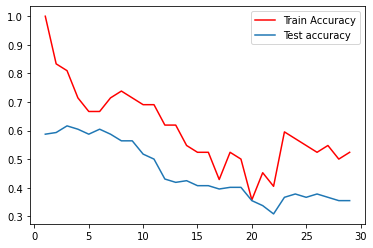

In [ ]:
plt.plot(range(1,30),trainac,color='red',label='Train Accuracy')
plt.plot(range(1,30),testac,label='Test accuracy')
plt.xlabel=('K-value')
plt.ylabel=('Accuracy')
plt.legend()

In [ ]:
predict(KNeighborsClassifier(n_neighbors=20))

0.35714285714285715
0.3546511627906977
              precision    recall  f1-score   support

           1       0.42      0.61      0.50        56
           2       0.30      0.47      0.36        58
           3       0.00      0.00      0.00        14
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00        24

    accuracy                           0.35       172
   macro avg       0.12      0.18      0.14       172
weighted avg       0.24      0.35      0.28       172

